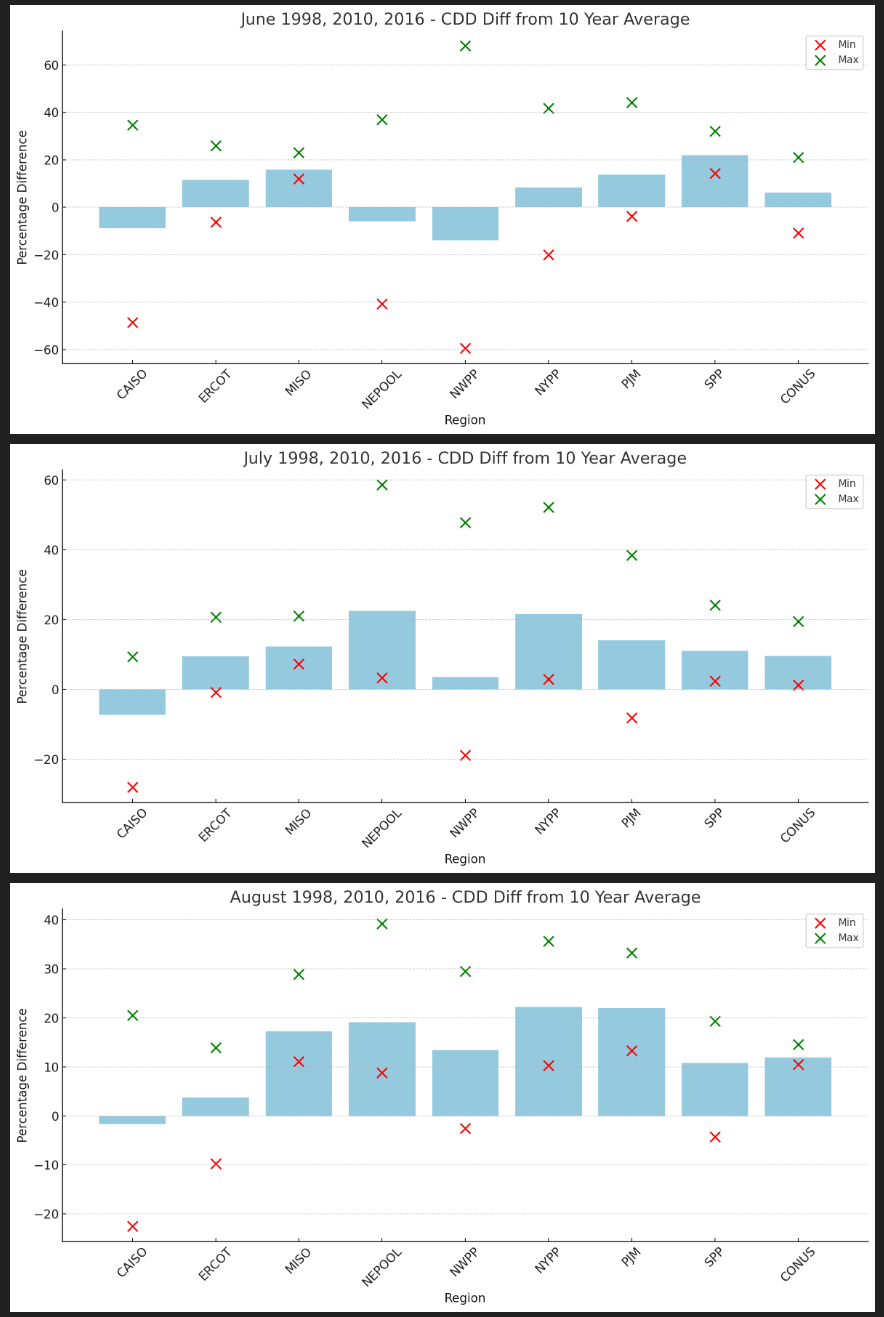

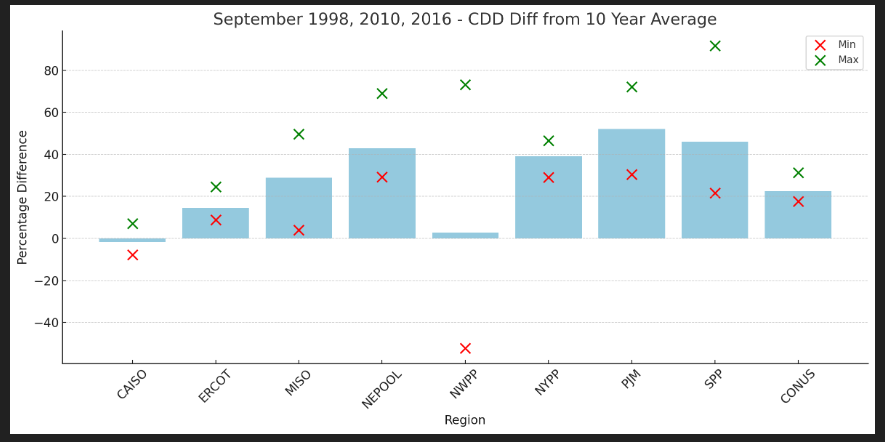

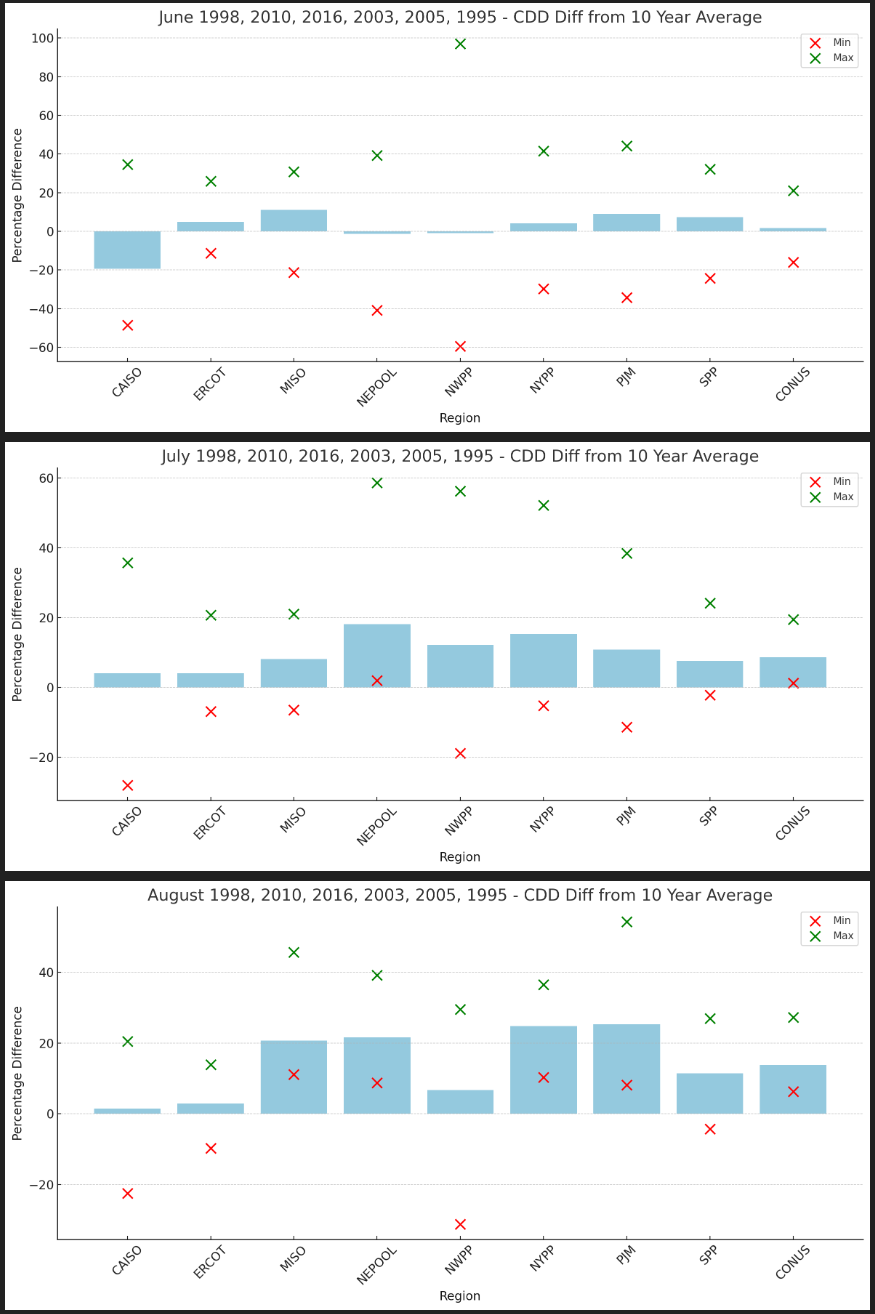

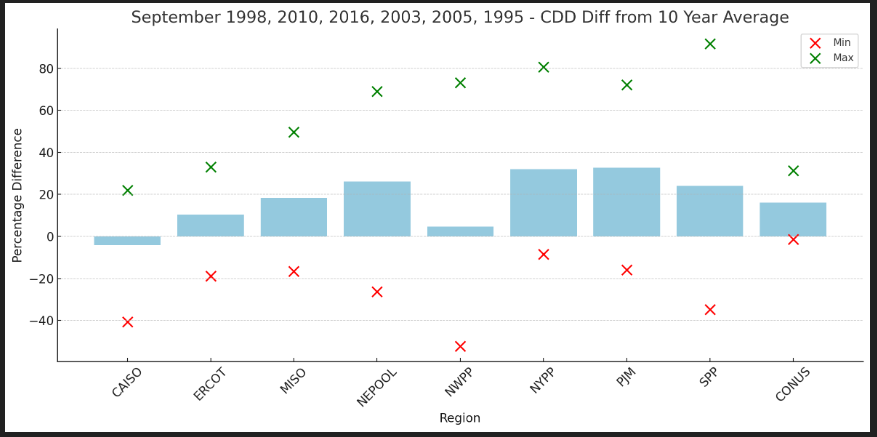

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/path/to/your/modified_grouped_data_with_rolling_averages_including_2024.csv')

# Function to plot the graph for a given month and years
def plot_region_pct_diff_for_month(data, month, years):
    # Filter data for the specified month and years
    filtered_data = data[(data['Month'] == month) & (data['Year'].isin(years))]
    
    # Prepare data for plotting
    means = filtered_data.mean().filter(like='_PctDiff').rename('Mean').reset_index()
    means['Region'] = means['index'].str.replace('_PctDiff', '')
    mins = filtered_data.min().filter(like='_PctDiff').rename('Min').reset_index()
    mins['Region'] = mins['index'].str.replace('_PctDiff', '')
    maxes = filtered_data.max().filter(like='_PctDiff').rename('Max').reset_index()
    maxes['Region'] = maxes['index'].str.replace('_PctDiff', '')

    # Plot setup
    plt.figure(figsize=(12, 6))

    # Plot the means as bars
    sns.barplot(x='Region', y='Mean', data=means, color='skyblue')

    # Plot the min values as red 'x'
    for index, row in mins.iterrows():
        plt.scatter(row['Region'], row['Min'], color='red', s=100, label='Min' if index == 0 else "")

    # Plot the max values as green 'x'
    for index, row in maxes.iterrows():
        plt.scatter(row['Region'], row['Max'], color='green', s=100, label='Max' if index == 0 else "")
    
    # Final plot adjustments
    month_name = pd.to_datetime(f"1900-{month}-01").strftime('%B')
    plt.title(f'{month_name} {", ".join(map(str, years))} - CDD Diff from 10 Year Average')
    plt.ylabel('Percentage Difference')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()

# Define the group of years for the analysis
years_group = [1998, 2010, 2016, 2003, 2005, 1995]

# Generate the charts for each month from June to December
for month in range(6, 13):
    plot_region_pct_diff_for_month(data, month, years_group)


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/your/modified_grouped_data_with_rolling_averages_including_2024.csv'